In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Helpful Links
======

[Brandon Rhodes Github](https://github.com/brandon-rhodes/pycon-pandas-tutorial/)

[Changing Data Types](https://www.ritchieng.com/pandas-changing-datatype/)

[Renaming Columns](https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/)

[Jupyter Notebooks for Beginners](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

In [3]:
df = pd.read_csv('tornadoes.csv', encoding = "ISO-8859-1")

In [4]:
df.head()

,YYYY_LOCAL,MM_LOCAL,DD_LOCAL,HHMM_LOCAL,YYYYMMDDHH,YYYY_SOLAR,MM_SOLAR,DD_SOLAR,HHMM_SOLAR,NEAR_CMMTY,...,END_LON_W,LENGTH_M,MOTION_DEG,WIDTH_MAX_,HUMAN_FATA,HUMAN_INJ,ANIMAL_FAT,ANIMAL_INJ,DMG_THOUS,FORECAST_R
0,1980.0,4.0,6.0,1920.0,19800407 0020,1980.0,4.0,6.0,1847.0,Altona,...,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,Morden - Winkler - Altona - Emerson - Morris
1,1980.0,5.0,5.0,2000.0,19800506 2300,1980.0,5.0,5.0,1839.0,Stratford,...,-80.963823,4190,265,30,-999,-999,-999,-999,-999.0,Huron - Perth
2,1980.0,5.0,25.0,1750.0,19800525 2350,1980.0,5.0,25.0,1559.0,Creelman,...,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,Estevan - Weyburn - Radville - Milestone
3,1980.0,5.0,28.0,1700.0,19800528 2200,1980.0,5.0,28.0,1530.0,16 km S of Morden,...,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,Morden - Winkler - Altona - Emerson - Morris
4,1980.0,5.0,31.0,1334.0,19800531 1734,1980.0,5.0,31.0,1217.0,Georgetown to Woodbridge,...,-79.643235,26300,245,490,0,0,0,0,900.0,Halton - Peel


In [5]:
# Number of tornadoes recorded in Canada from 1980 to 2009
len(df)

1839

In [6]:
df.columns
columns_of_interest = ['YYYY_LOCAL', 'MM_LOCAL', 'DD_LOCAL', 'HHMM_LOCAL',
        'NEAR_CMMTY',
       'PROVINCE', 'START_LAT_', 'START_LON_', 'END_LAT_N',
       'END_LON_W', 'LENGTH_M', 'MOTION_DEG', 'WIDTH_MAX_', 'DMG_THOUS']
df = df[columns_of_interest]
df.head()

,YYYY_LOCAL,MM_LOCAL,DD_LOCAL,HHMM_LOCAL,NEAR_CMMTY,PROVINCE,START_LAT_,START_LON_,END_LAT_N,END_LON_W,LENGTH_M,MOTION_DEG,WIDTH_MAX_,DMG_THOUS
0,1980.0,4.0,6.0,1920.0,Altona,MB,49.105000,-97.568000,-999.000000,-999.000000,-999,-999,-999,-999.0
1,1980.0,5.0,5.0,2000.0,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,-999.0
2,1980.0,5.0,25.0,1750.0,Creelman,SK,49.840000,-103.630000,-999.000000,-999.000000,-999,-999,-999,-999.0
3,1980.0,5.0,28.0,1700.0,16 km S of Morden,MB,49.190000,-98.100000,-999.000000,-999.000000,-999,-999,-999,-999.0
4,1980.0,5.0,31.0,1334.0,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,900.0


In [17]:
# give better names to columns
df.columns=['year', 'month', 'day', 'hhmm', 'community', 'province', 'start_lat_n', 'start_lon_w', 'end_lat_n', 'end_lon_w',
           'length', 'motion_deg', 'width_max', 'dmg_thous']
df.head(2)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,dmg_thous
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.0000,-999.000000,-999,-999,-999,-999.0
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.3897,-80.963823,4190,265,30,-999.0


In [16]:
df['year'] = df.year.astype(int)
df['month'] = df.month.astype(int)
df['day'] = df.day.astype(int)
df['hhmm'] = df.hhmm.astype(int)
df.head(2)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,dmg_thous
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.0000,-999.000000,-999,-999,-999,-999.0
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.3897,-80.963823,4190,265,30,-999.0


In [9]:
#df.dtypes

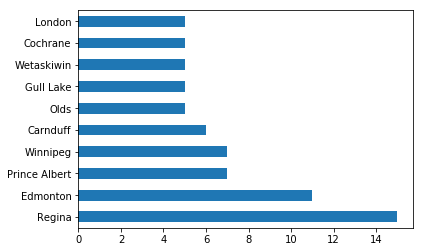

In [10]:
# Most frequent tornado locations in Canada from 1980 to 2009
df.community.value_counts().head(10).plot(kind='barh')

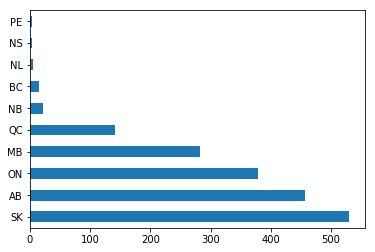

In [11]:
# Most active tornado provinces
df.province.value_counts().plot(kind='barh')

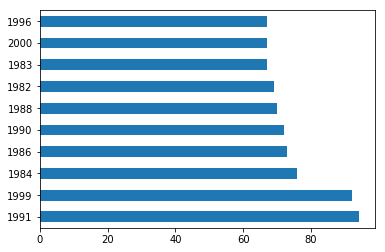

In [12]:
# Most Active tornado years
df.year.value_counts().head(10).plot(kind='barh')

In [13]:
# most active years scatter plot

In [14]:
# scatter plot with a trend line

In [15]:
# table of ontario most active communities

In [41]:
df = df.groupby(['year' , 'province']).size()
#df
df.unstack('year').fillna(' ')

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
province,,,,,,,,,,,,,,,,,,,,,
AB,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BC,,,,,,,,,1,,...,,1,1,1,,,,,1,
MB,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
NB,1,1,1,1,,,,,,,...,,,1,,1,1,1,1,,
NL,,,,1,,,,1,,,...,,,,,,,,1,,
NS,1,,,,,,,,,,...,,,,,,,,,,
ON,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PE,1,,1,,,,,,,,...,,,,,,,,1,,
QC,1,,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
